<b> Problem Statement

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

<b>Data Dictionary

Ticket #: Ticket number assigned to each complaint<br>
Customer Complaint: Description of complaint<br>
Date: Date of complaint<br>
Time: Time of complaint<br>
Received Via: Mode of communication of the complaint<br>
City: Customer city<br>
State: Customer state<br>
Zipcode: Customer zip<br>
Status: Status of complaint<br>
Filing on behalf of someone<br>

<b>Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_telecom=pd.read_csv('F://SimpliLearn//Data Science//Projects//Comcast_telecom_complaints_data.csv')

In [3]:
df_telecom.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


<b> Task 1- Data has been imported into Python environment

In [4]:
#Checking the shape of the dataframe 
df_telecom.shape

(2224, 11)

In [5]:
#Checking the datatypes of the dataframe
df_telecom.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [6]:
#Checking for null values in the dataset
df_telecom.isna().sum(axis=0)

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [7]:
#Trend Chart for complaints on monthly and daily basis
#First converting the Date column from object to DateTime64
df_telecom['Date']=pd.to_datetime(df_telecom['Date'])
df_telecom.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [8]:
# We create Month and Year column from Date column
# We also print the unique values in the year column to see across how many years the data is spread 
df_telecom['Month']=pd.DatetimeIndex(df_telecom['Date']).month
df_telecom['Year']=pd.DatetimeIndex(df_telecom['Date']).year
print(df_telecom['Year'].unique())
df_telecom.head()

[2015]


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Year
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,2015
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,2015
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,2015


We see that there is only a single unique value in Year column. So this dataset gives the information about complaints regarding year 2015. Since, there is only one value for Year column, we can drop it.

In [9]:
# There is only 1 year present. We can drop that column.
df_telecom.drop(['Year'], axis=1, inplace=True)
df_telecom.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5


In [10]:
#Creating a day column to show the daily trend
df_telecom['Day']=df_telecom['Date'].dt.day_name()
df_telecom.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wednesday
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,Wednesday
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Saturday
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,Thursday
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Tuesday


In [11]:
# Plotting the trends
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Trend chart at monthly level')

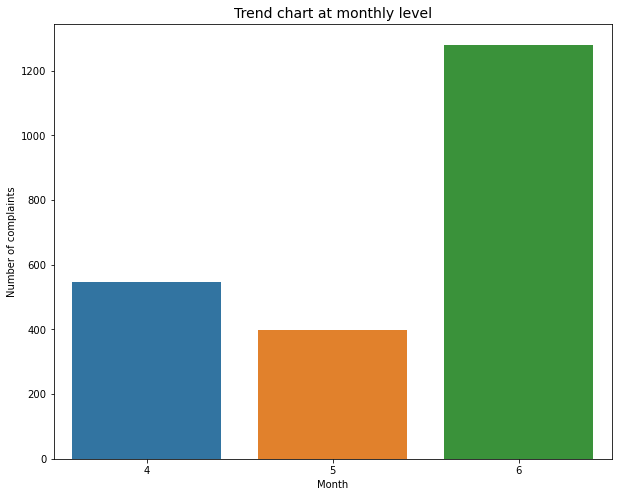

In [13]:
plt.rcParams['figure.figsize']=(10,8)
sns.countplot('Month', data=df_telecom)
plt.xlabel('Month')
plt.ylabel('Number of complaints')
plt.title('Trend chart at monthly level', fontsize=14)

**Task 2- This is number of complaints registered at monthly level.** <br> We can see that June has the highest number of complaints, whereas May comparatively had the least number of complaints.

Text(0.5, 1.0, 'Trend chart at daily level')

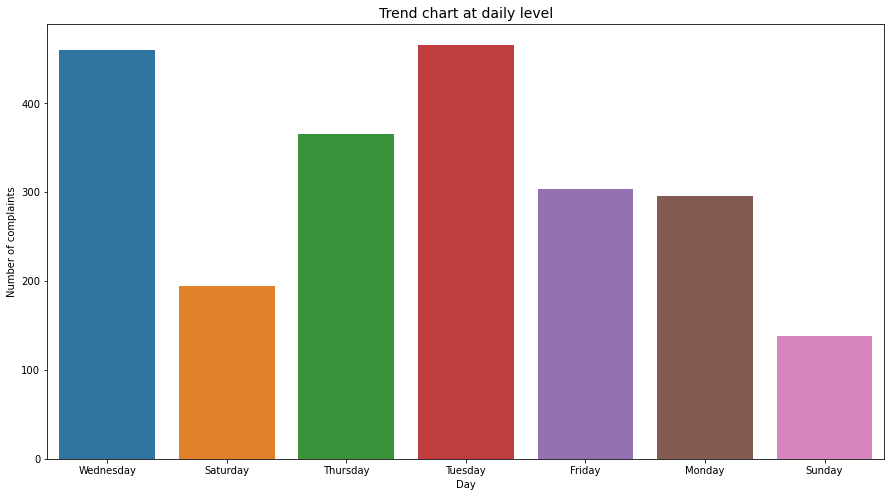

In [14]:
plt.rcParams['figure.figsize']=(15,8)
sns.countplot('Day', data=df_telecom)
plt.xlabel('Day')
plt.ylabel('Number of complaints')
plt.title('Trend chart at daily level', fontsize=14)

**Task 2- This is number of complaints registered at daily level.** <br> We can see that the complaints registered midweek on Tuesday and Wednesday are maximum. The complaints are less on weekends (Saturday and Sunday).

In [15]:
# A table with the frequency of complaint types.
df_telecom['Customer Complaint'].value_counts()

Comcast                                              83
Comcast Internet                                     18
Comcast Data Cap                                     17
comcast                                              13
Data Caps                                            11
                                                     ..
Comcast Re-Escalation of Case # ESL01877347 - ORR     1
not getting what I am paying for with internet        1
internet speeds slow                                  1
I am so fed up with Comcast                           1
Postal Mail Ticket #2334                              1
Name: Customer Complaint, Length: 1841, dtype: int64

**Task 3- A table with the frequency of complaint types**  <br> It shows that Comcast is the highest complaint type registered. It probably is because most of the complaints were just registered on the name of the company Comcast, without stating the problem type. Second highest complaint was for Comcast Internet which shows its internet issues. Third was the Comcast Data Cap.

In [16]:
# Creating a new categorical variable as Open and Closed.
oc=[]
for i in df_telecom['Status']:
    if (i=='Open')|(i=='Pending'):
        oc.append('Open')
    else:
        oc.append('Closed')
df_telecom['New_status']=oc
df_telecom.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,New_status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wednesday,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,Wednesday,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Saturday,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,Thursday,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Tuesday,Closed


**Task 4- A new categorical variable named New_Status has been created.** Open & Pending has been categorized as Open and Closed & Solved has been categorized as Closed.

In [17]:
# State wise status of complaints in a stacked bar chart.
#Checking the unique State names 
df_telecom['State'].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [18]:
# Checking the number of states
len(df_telecom['State'].unique())

43

In [19]:
# To create a stacked bar graph of non numeric columns, first we have to group them together using groupby and then count. Also unstack the data
df_grouped= df_telecom.groupby(['State', 'New_status']).size().unstack()
df_grouped

New_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


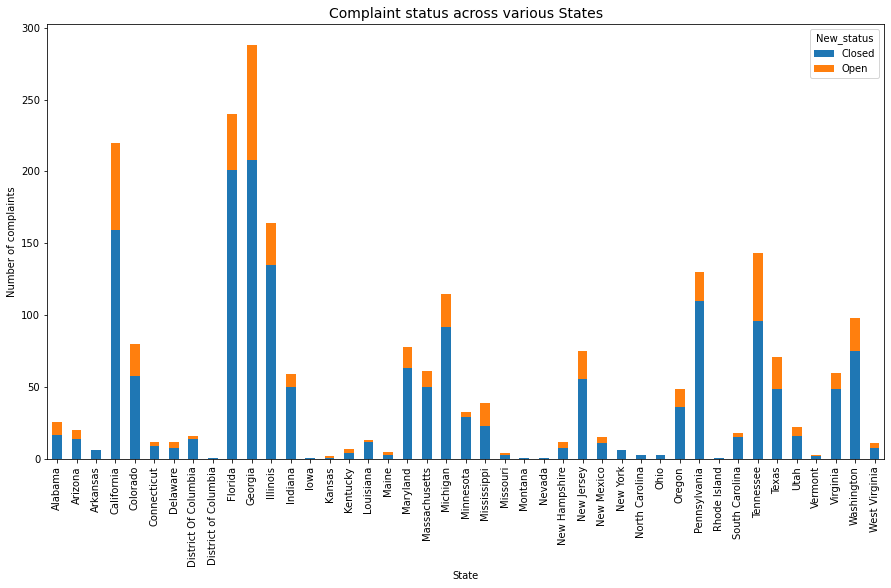

In [20]:
#Creating the stacked bar plot
plt.rcParams['figure.figsize']=(15,8)
df_grouped.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Number of complaints')
plt.title('Complaint status across various States', fontsize=14)
plt.show()

**Task 5- State wise status of complaints in a stacked bar chart.** <br> **Insight:** The state having highest complaints registered is **Georgia**.

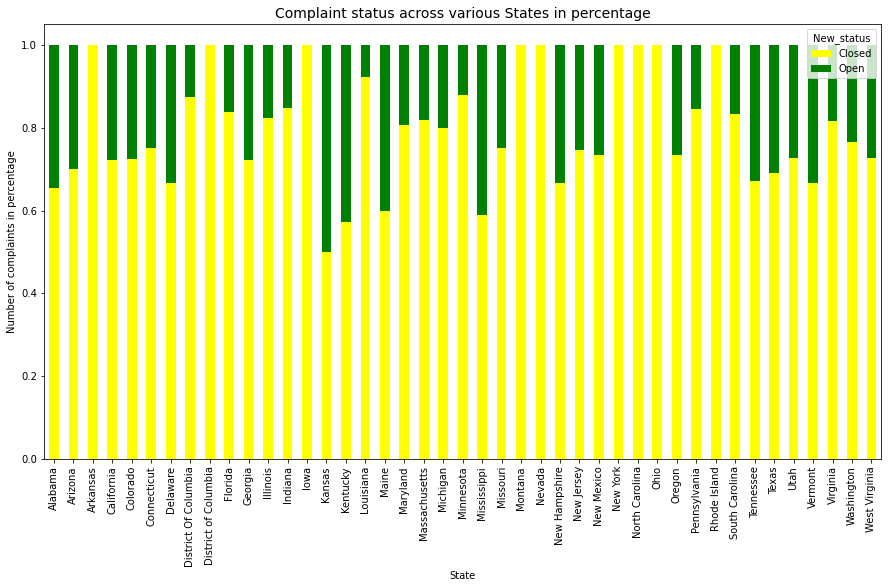

In [21]:
# In terms of percentage 
df_percentage=pd.crosstab(df_telecom['State'], df_telecom['New_status'], normalize='index')
plt.rcParams['figure.figsize']=(15,8)
df_percentage.plot(kind='bar', stacked=True, color=['yellow', 'green'])
plt.xlabel('State')
plt.ylabel('Number of complaints in percentage')
plt.title('Complaint status across various States in percentage', fontsize=14)
plt.show()

**Insight:** The state having highest percentage of unresolved complaints is **Kansas**

In [22]:
# For percentage of complaints resolved till date, which were received through the Internet and customer care calls.
# First looking at the unique values in Received Via column
df_telecom['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

There are only two unique values,'Customer Care Call' and 'Internet'.

In [23]:
# Grouping the complaint receiving ways in terms of open or closed case 
df_groupby2=df_telecom.groupby(['Received Via', 'New_status']).size().unstack()
df_groupby2

New_status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [24]:
#The percentage
percent=((864+843)/(864+843+255+262))*100
print('Percentage of complaints resolved till date, received through the Internet and customer care calls is', percent, '%')

Percentage of complaints resolved till date, received through the Internet and customer care calls is 76.75359712230215 %


**Task 6- The percentage of complaints resolved till date, which were received through the Internet and customer care calls**